# Used Cars Prices Prediction

### Step 1: Problem Definition

#### Introduction  

This notebook focuses on the development of a machine learning model to predict the selling prices of used cars based on a variety of features. The dataset being used for this project, Used Car Price Prediction Dataset, contains comprehensive data about cars, including attributes such as car model, manufacturer, mileage, fuel type, and engine details.

Accurately predicting used car prices is valuable for both buyers and sellers, as it helps in making informed decisions regarding the pricing of vehicles in the secondary market. By leveraging machine learning techniques, the goal of this project is to build a predictive model that can estimate the selling price of a car based on its features, improving transparency and efficiency in the used car market.

In this notebook, we will walk through the following key steps:

1. **Data Exploration and Preprocessing:** Understanding the structure of the dataset, handling missing values, and encoding categorical variables.
2. **Feature Engineering:** Identifying the most relevant features and transforming the data to optimize model performance.
3. **Model Selection and Evaluation:** Building and evaluating multiple regression models using various techniques, with the goal of selecting the model that best predicts the car prices.
4. **Hyperparameter Tuning and Model Optimization:** Fine-tuning the selected model to enhance its predictive accuracy.

By the end of this project, we aim to create a reliable and interpretable model that can provide price predictions for used cars with a high degree of accuracy.

<br>

#### Objective  

Build a predictive model that can estimate the selling price of a car based on its features, improving transparency and efficiency in the used car market.

<br>


#### Database - Features

* **id**:&nbsp;A control number used to order all observations.    
* **brand**:&nbsp;Identify the brand or company manufacturer.
* **model**:&nbsp;Identify the commercial.
* **model_year**:&nbsp;Discover the manufacturing year of the vehicles, crucial for assessing depreciation and technology advancements.  
* **mileage**:&nbsp;Obtain the mileage of each vehicle, a key indicator of wear and tear and potential maintenance requirements.
* **fuel_type**:&nbsp;Learn about the type of fuel the vehicles run on, whether it's gasoline, diesel, electric, or hybrid.
* **engine**:&nbsp;Understand the engine specifications, shedding light on performance and efficiency.
* **transmission**:&nbsp;Determine the transmission type, whether automatic, manual, or another variant.
* **ext_col**:&nbsp;Explore the aesthetic aspects of the vehicles, specifically exterior color options.
* **int_col**:&nbsp;Explore the aesthetic aspects of the vehicles, specifically interior color options.
* **accident**:&nbsp;Discover whether a vehicle has a prior history of accidents or damage, crucial for informed decision-making.
* **clean_title**:&nbsp;Evaluate the availability of a clean title, which can impact the vehicle's resale value and legal status.
* **price**:&nbsp;Access the listed prices for each vehicle, aiding in price comparison and budgeting.

---  

<br>  

### Step 2: Load Pre-requisites

#### Install packages

In [1]:
# Workaround to install LazyPredict Package
!wget https://github.com/andrerizzo/Utilities/raw/refs/heads/master/lazypredict.tar.gz
!pip install lazypredict.tar.gz

# Normal installation
!pip install joblib
!pip install dask[dataframe]

--2024-09-27 20:08:40--  https://github.com/andrerizzo/Utilities/raw/refs/heads/master/lazypredict.tar.gz
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/andrerizzo/Utilities/refs/heads/master/lazypredict.tar.gz [following]
--2024-09-27 20:08:40--  https://raw.githubusercontent.com/andrerizzo/Utilities/refs/heads/master/lazypredict.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22932 (22K) [application/octet-stream]
Saving to: ‘lazypredict.tar.gz.1’

lazypredict.tar.gz. 100%[===================>]  22.39K  --.-KB/s    in 0.007s  

2024-09-27 20:08:40 (3.10 MB/s) - ‘lazypredict.tar.gz.1’

#### Load libraries

In [3]:
# Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from scipy.stats import skew, kurtosis
import math
import re

# Biblioteca para salvar modelo
import joblib

# Biblioteca para descompactar arquivo
import zipfile
import requests

# Biblioteca para análise dos melhores modelos
from lazypredict.Supervised import LazyRegressor

# Scikit Learn Misc
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, RFE, RFECV
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Modelos
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

# Hyperparameters Optimization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report


---

<br>

### Step 3: Data Collection

#### 3.1 - Download dataset - This dataset was hosted originally on Kaggle.

In [4]:
!wget https://github.com/andrerizzo/Used_Cars_Price_Prediction/raw/refs/heads/master/Dataset/train.zip

--2024-09-27 20:09:37--  https://github.com/andrerizzo/Used_Cars_Price_Prediction/raw/refs/heads/master/Dataset/train.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/andrerizzo/Used_Cars_Price_Prediction/refs/heads/master/Dataset/train.zip [following]
--2024-09-27 20:09:37--  https://raw.githubusercontent.com/andrerizzo/Used_Cars_Price_Prediction/refs/heads/master/Dataset/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4714876 (4.5M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>]   4.50M  16.9MB/s    in 0.3s    

2024-09-27 20:09:38 (16.9

#### 3.2 - Extract file from zip

In [5]:
zip = zipfile.ZipFile('train.zip', 'r')
zip.extractall()

#### 3.3 - Create dataframe

In [6]:
df = pd.read_csv('train.csv')

In [8]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


---

<br>

### Step 4: Exploratory Data Analysis

#### Dataset overview

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


#### Check features with null observations

In [14]:
nf = df.isnull().any().sum()
print('Number of features with null observations:', nf)

Number of features with null observations: 3


In [15]:
df.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,5083
engine,0
transmission,0
ext_col,0
int_col,0


#### Null observations analysis in **fuel_type** feature.

In [12]:
conta = 0
fuel = df[df.fuel_type.isnull()]
fuel = fuel['engine']
for word in fuel.values:
    result = re.search(r'Electric', str(fuel))
    if result:
        conta = conta + 1
print('Número de veículos com tipo de combustível nulo e motor elétrico:', conta)

Número de veículos com tipo de combustível nulo e motor elétrico: 5083


*Action: &nbsp;Impute null observations with 'Electric'*

<br>

<br>

#### Analysis of *accident* and *clean_title* features' null observations.

##### Check observations where accident and clean_title features are both null

In [27]:
len(df[(df.accident.isnull()) & (df.clean_title.isnull())])

2438

In [28]:
len(df[(df.accident.isnull()) & (df.clean_title.isnull())]) / len(df.accident)

0.012931423146080527

###### *Action: &nbsp;Drop observations.*

<br>

##### Check observations where **accident** is equal to None and **clean_title** is null

In [21]:
len(df[(df.accident == 'None reported') & (df.clean_title.isnull())])

17827

###### *Action: &nbsp;Impute **clean_title** nulls with 'Yes'.*

<br>

##### Check observations where **accident** is different from None and null and **clean_title** is null.   

In [26]:
len(df[(df.accident != "None reported") & (df.accident.notnull()) & (df.clean_title.isnull())])

1154

###### *Action: &nbsp;Impute **clean_title** with 'No'.*

<br>

##### Check observations where accident is null and clean_title is not null

In [30]:
len(df[(df.accident.isnull()) & (df.clean_title.notnull())])

14

###### *Action: Impute **accident** with 'None reported'.*

<br>

<br>

#### Check if there are repeated features.

In [33]:
dup_feat = df.duplicated().sum()
print('Number of repeated features:', dup_feat)

Number of repeated features: 0


<br>

<br>

#### Numerical analysis

In [37]:
var_numericas = ['model_year', 'milage', 'price']
var_categoricas = ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']

In [38]:
results = pd.DataFrame({
    'Assimetria': df[var_numericas].apply(skew),
    'Curtose': df[var_numericas].apply(kurtosis),
    'Média': df[var_numericas].mean(),
    'Mediana': df[var_numericas].median(),
    'Variância': df[var_numericas].var(),
    'Desvio Padrão': df[var_numericas].std(),
    'Mínimo': df[var_numericas].min(),
    'Máximo': df[var_numericas].max()
})

results

,Assimetria,Curtose,Média,Mediana,Variância,Desvio Padrão,Mínimo,Máximo
model_year,-1.04,0.75,2015.83,2017.00,32.05,5.66,1974,2024
milage,0.90,0.68,65705.30,57785.00,2479856547.74,49798.16,100,405000
price,20.27,623.95,43878.02,30825.00,6212517088.42,78819.52,2000,2954083


<br>

<br>

#### Univariate Graphical Analysis

##### Feature Price

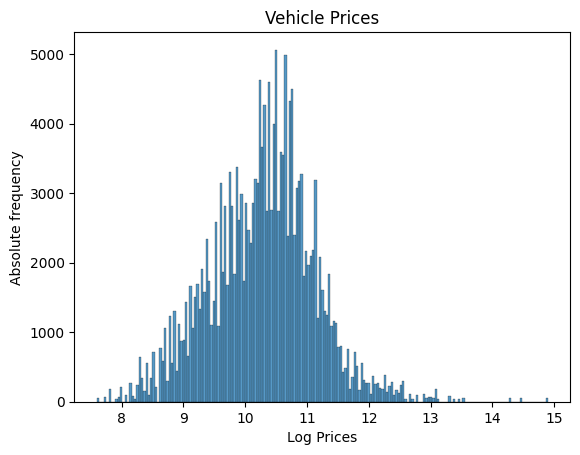

In [56]:
ax = sns.histplot(np.log(df['price']))
plt.title('Vehicle Prices')
ax.set_xlabel('Log Prices')
ax.set_ylabel('Absolute frequency')
#ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.show()

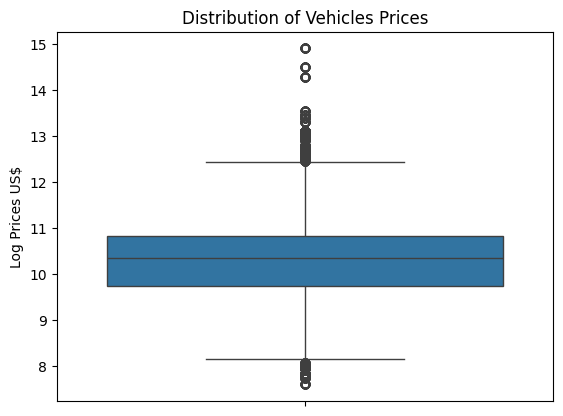

In [51]:
ax = sns.boxplot(np.log(df['price']))
plt.title('Distribution of Vehicles Prices')
ax.set_ylabel('Log Prices US$')
plt.show()

Analysis:  
25% of the vehicles cost no more than USD 22,000.  
About 50% cost between USD 22,000 and USD 59,874.  
About 25% of the vehicles cost more than USD 59,874.

In [57]:
df[df.price < math.exp(8)]

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
348,348,Volkswagen,Eurovan MV,2001,121800,Gasoline,140.0HP 2.8L V6 Cylinder Engine Gasoline Fuel,A/T,Green,Black,None reported,Yes,2300
456,456,Ford,F-250 XL SuperCab H/D,1997,90400,Gasoline,220.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,A/T,Red,Gray,None reported,Yes,2800
462,462,Mercedes-Benz,Sprinter 2500,2004,158366,Diesel,161.0HP 2.1L 4 Cylinder Engine Diesel Fuel,A/T,White,–,At least 1 accident or damage reported,Yes,2300
758,758,Pontiac,Firebird Trans Am,2001,150000,Gasoline,310.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Beige,None reported,Yes,2000
1044,1044,Jeep,Cherokee X,2018,64549,E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,A/T,White,Black,NaN,NaN,2899
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186854,186854,Volkswagen,New Beetle GLS,2001,46508,Gasoline,115.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,5-Speed M/T,Silver,Black,At least 1 accident or damage reported,Yes,2500
187603,187603,Hyundai,Sonata SE,2013,87001,Gasoline,200.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,White,Gray,At least 1 accident or damage reported,Yes,2300
187838,187838,Dodge,Ram 1500 Laramie Mega Cab,2010,155000,Gasoline,345.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Gray,At least 1 accident or damage reported,Yes,2500
187916,187916,Chrysler,300C Base,2011,117292,Gasoline,292.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Beige,Beige,At least 1 accident or damage reported,Yes,2300


There are 409 vehicles costing less than US$2,980.  

<br>

In [60]:
df[df.price >= 268000]

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
220,220,Ford,F-150 XLT,2021,26315,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Agate Black Metallic,Black,None reported,Yes,2954083
267,267,Aston,Martin Vantage GT Base,2017,127600,Gasoline,430.0HP 4.7L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,Black,Black,None reported,Yes,315000
296,296,Mercedes-Benz,S-Class S 550 4MATIC,2020,44300,Gasoline,449.0HP 4.7L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,489000
350,350,Mercedes-Benz,GLS 550 Base 4MATIC,2018,67482,Gasoline,449.0HP 4.7L 8 Cylinder Engine Gasoline Fuel,9-Speed A/T,White,Beige,None reported,Yes,349950
417,417,Porsche,911 Turbo S,2023,16701,Gasoline,4.0L H6 24V GDI DOHC,6-Speed Manual,White,Black,None reported,Yes,275000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187912,187912,Mercedes-Benz,S-Class S 580 4MATIC,2021,12771,Gasoline,4.0L V8 32V GDI DOHC Twin Turbo,9-Speed Automatic,Red,Black,None reported,NaN,469900
187915,187915,Audi,RS 7 4.0T Prestige,2013,6397,Gasoline,560.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,324995
188022,188022,Lamborghini,Urus Base,2021,20069,Gasoline,6.5L V12 48V MPFI DOHC,Automatic,Rosso Mars Metallic,Nero Ade,None reported,NaN,359991
188192,188192,Porsche,Cayenne Base,2016,87500,Gasoline,300.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Black,Black,None reported,Yes,324995


There are 1769 vehicles costing more than US$268,000.  

<br>

In [61]:
df[df.price >= 1000000]

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
220,220,Ford,F-150 XLT,2021,26315,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Agate Black Metallic,Black,None reported,Yes,2954083
1880,1880,Chrysler,300C Base,2003,55900,Gasoline,340.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,5-Speed A/T,Beige,Beige,None reported,Yes,2954083
2964,2964,Porsche,911 R,2023,714,Gasoline,4.0L H6 24V GDI DOHC,6-Speed Manual,White,Gray,None reported,Yes,1950995
4164,4164,Rolls-Royce,Ghost Base,2016,38800,Gasoline,563.0HP 6.7L 12 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,1599000
8789,8789,Lamborghini,Gallardo LP570-4 Superleggera,2011,3254,Gasoline,5.2L V10 40V GDI DOHC,7-Speed Automatic with Auto-Shift,Nero Noctis,Nero Ade,None reported,Yes,1950995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183262,183262,Bentley,Continental GT Speed,2022,22001,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,1950995
183468,183468,Bentley,Continental GT V8,2021,59766,Gasoline,4.0L V8 32V GDI DOHC Twin Turbo,8-Speed Automatic,Dark Sapphire,Linen,None reported,Yes,2954083
185197,185197,Ford,F-250 King Ranch,2022,44457,Diesel,6.7L V8 32V DDI OHV Turbo Diesel,Automatic,Summit White,Medium Earth Gray,At least 1 accident or damage reported,Yes,1950995
186234,186234,Land,Rover Range Rover Sport HSE,2017,2437,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,A/T,Black,Black,None reported,Yes,1599000


148 cars cost more than US$1,000,000.

<br>

##### Most expensive cars brands  


In [69]:
super = df[df.price >= 1000000]
super = super.brand
super.value_counts()

,count
brand,
Porsche,28
Ford,16
Mercedes-Benz,15
Bentley,12
Chevrolet,11
Land,10
Cadillac,7
BMW,7
RAM,7


---

<br>

#### Feature brand

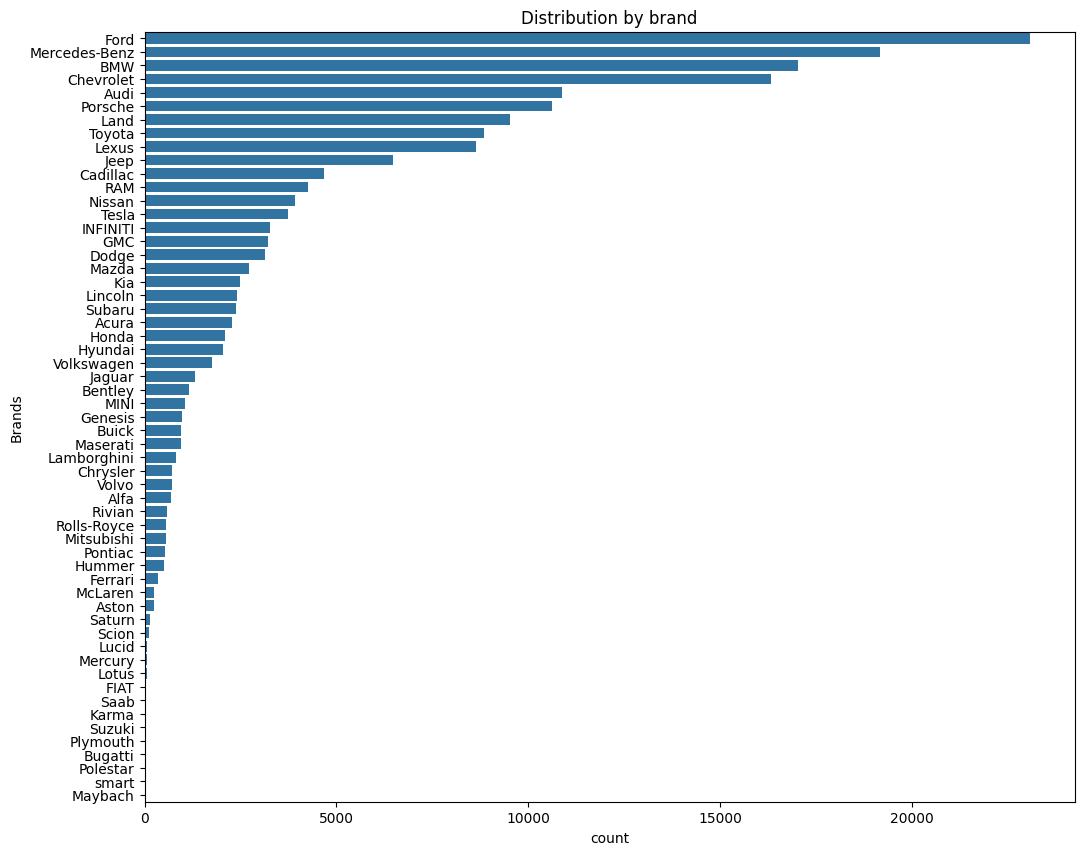

In [84]:
brand_order = df['brand'].value_counts().index
plt.figure(figsize=(12, 10))
ax = sns.countplot(df['brand'], order=brand_order)
plt.title('Distribution by brand')
ax.set_ylabel('Brands')
plt.show()